In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
"""
import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 
from traces.trace_utils import *
"""
    
from misc_utils import load_raw_responses_with_traces
from session_and_tree_utils import *  


from response_distributions_util import plot_metric, get_single_motivation, plot_metric_breakdowns
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy  
  

In [2]:
df = load_raw_responses_with_traces()
df = get_sessions_and_trees(df)
df['single motivation'] = df['motivation'].apply(get_single_motivation)

# Click Session Metrics

### Num Pageviews 

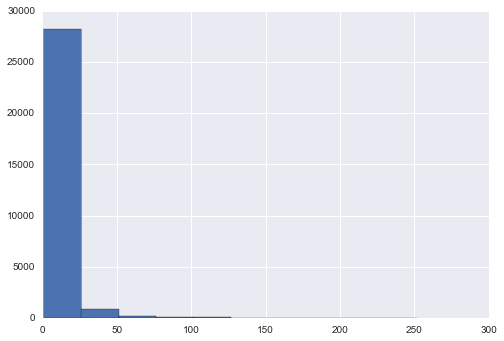

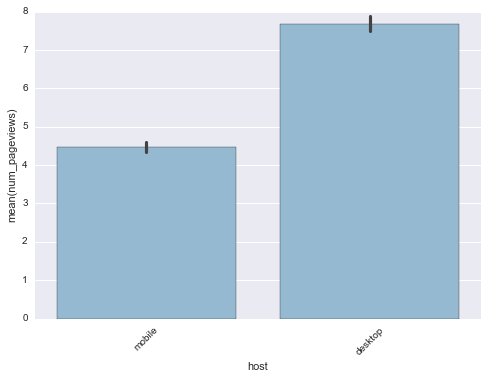

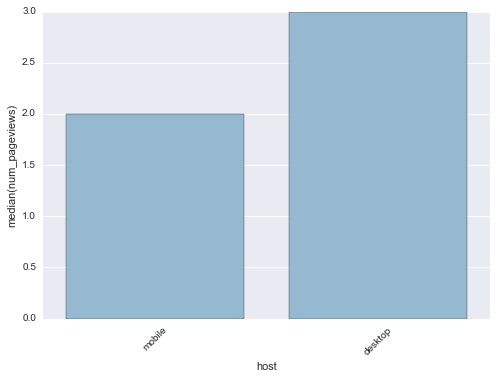

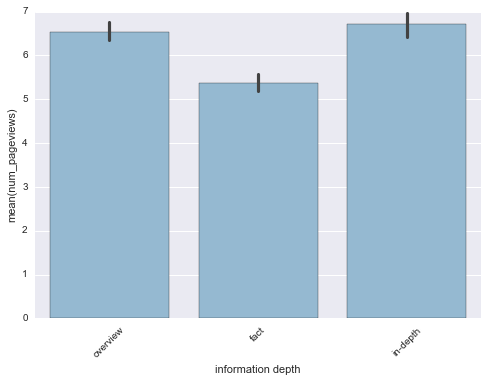

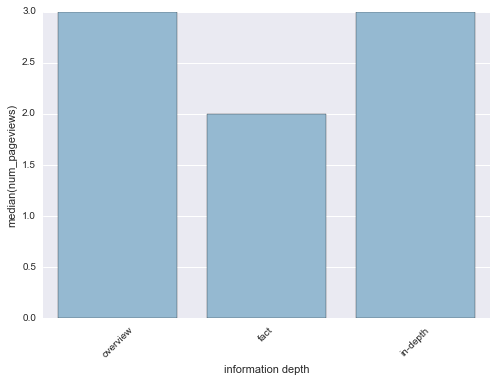

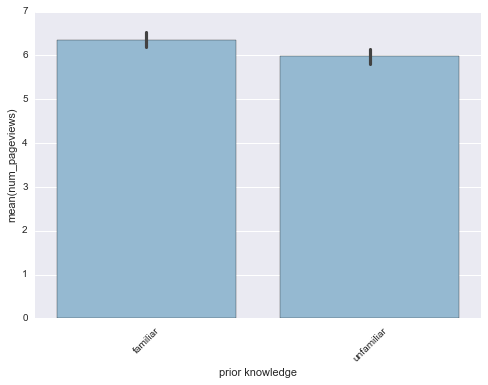

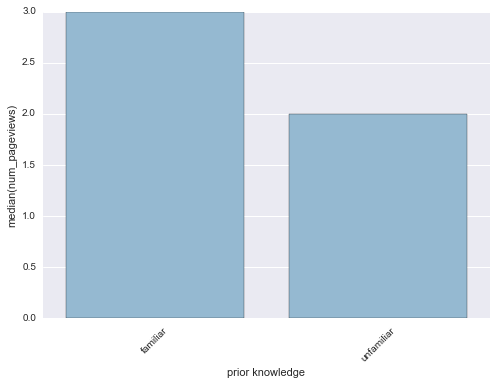

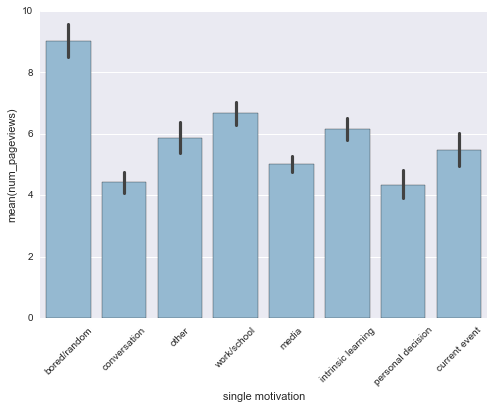

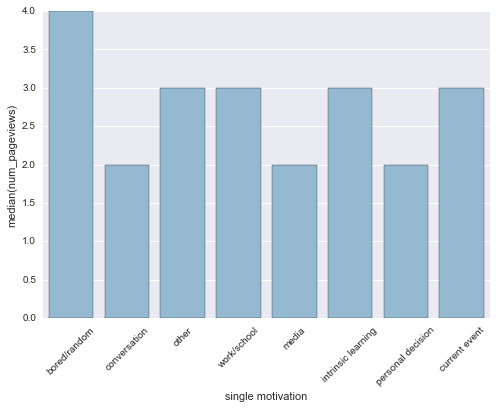

In [3]:
def num_pageviews(session):
    return len([r for r in session if 'is_pageview' in r and r['is_pageview'] == 'true'])

metric = 'num_pageviews'
df[metric] = df['click_session'].apply(num_pageviews)

plot_metric_breakdowns(df, metric)

### Session Length (Time)

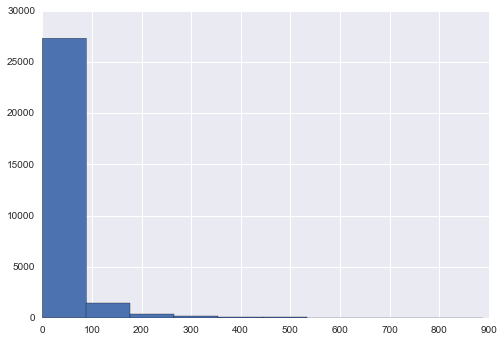

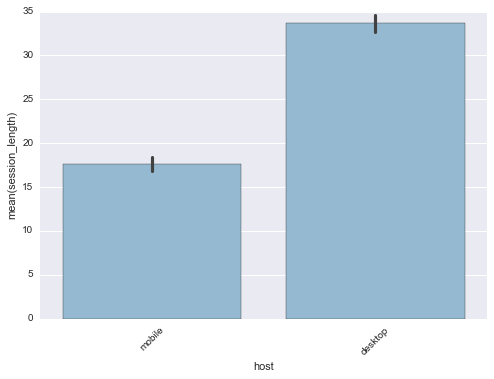

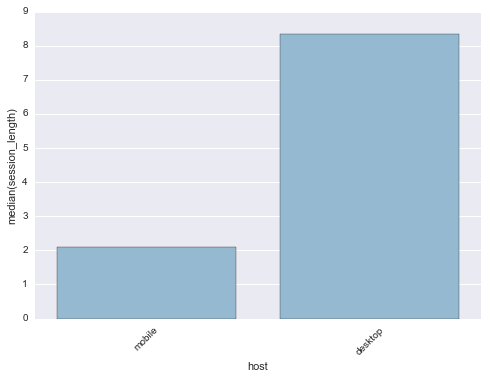

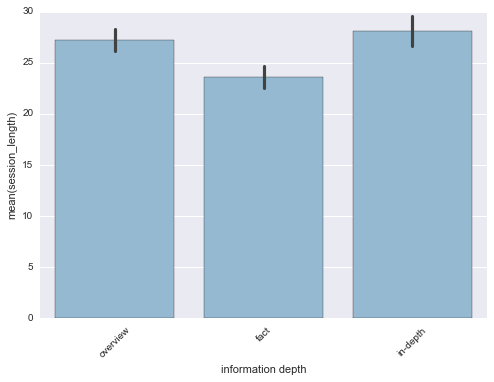

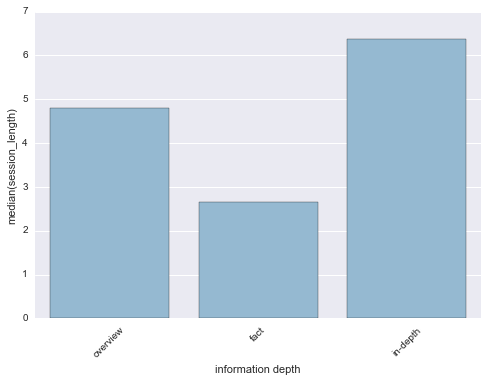

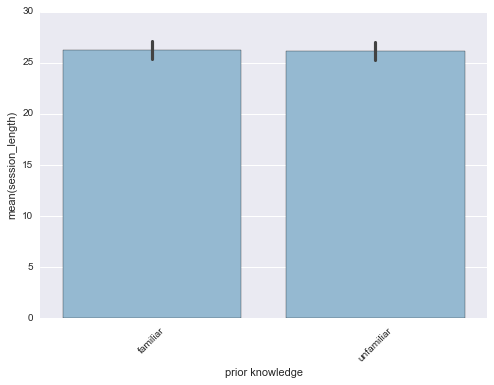

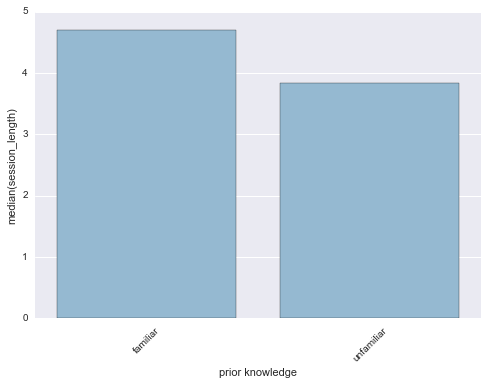

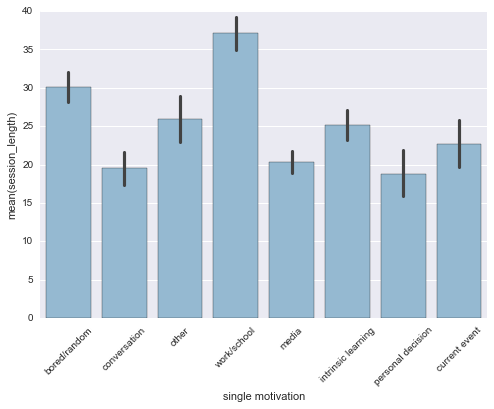

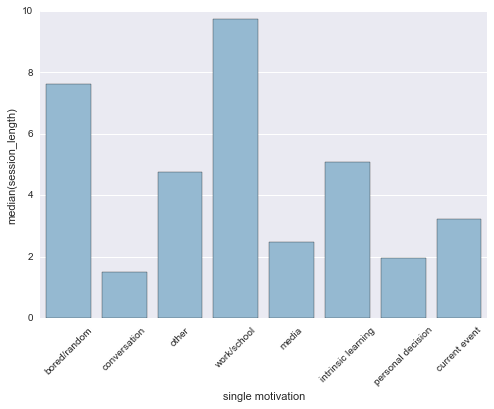

In [4]:
from datetime import datetime
import time

def get_session_length(session):
    if len(session) < 2:
        return 0
    else:
        d1 = session[0]['ts']
        d2 = session[-1]['ts']
        
        # convert to unix timestamp
        d1_ts = time.mktime(d1.timetuple())
        d2_ts = time.mktime(d2.timetuple())

        # they are now in seconds, subtract and then divide by 60 to get minutes.
        return (d2_ts-d1_ts) / 60
    
metric = 'session_length'

df[metric] = df['click_session'].apply(get_session_length)

plot_metric_breakdowns(df, metric)

### Search

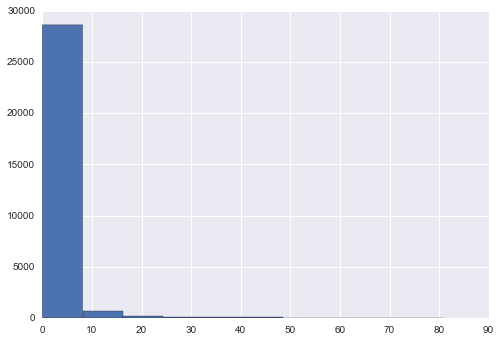

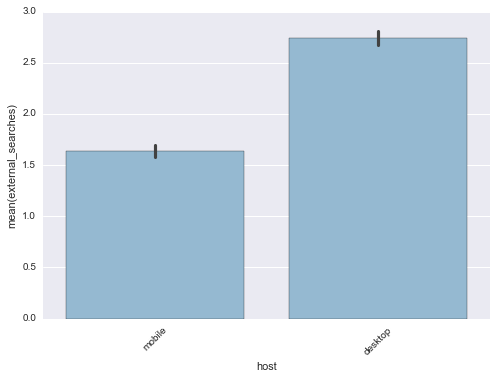

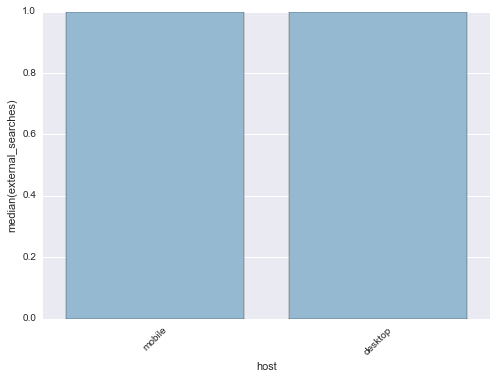

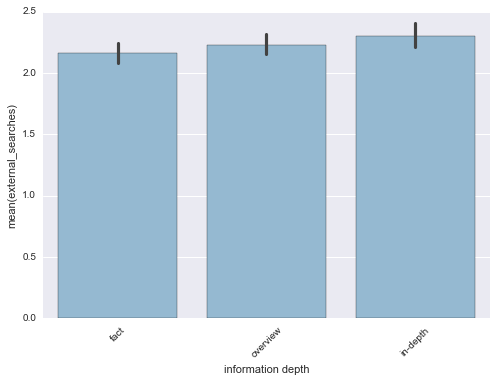

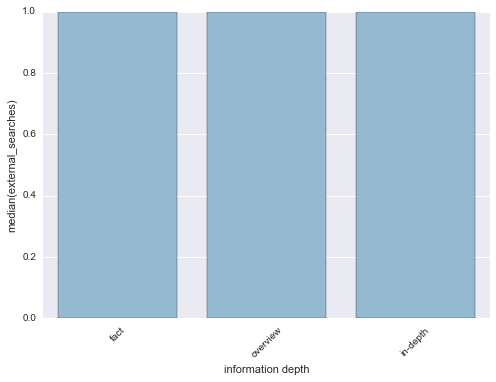

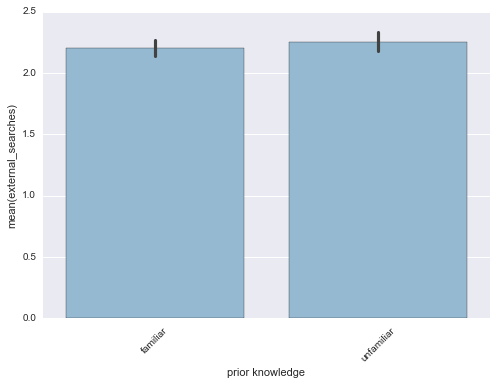

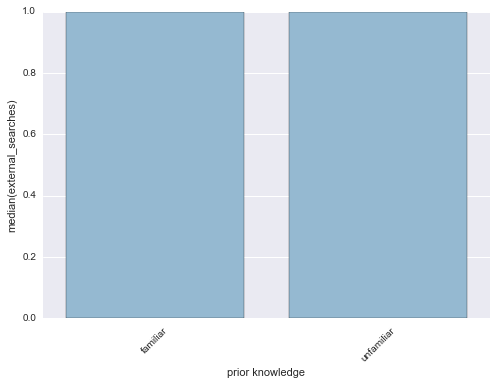

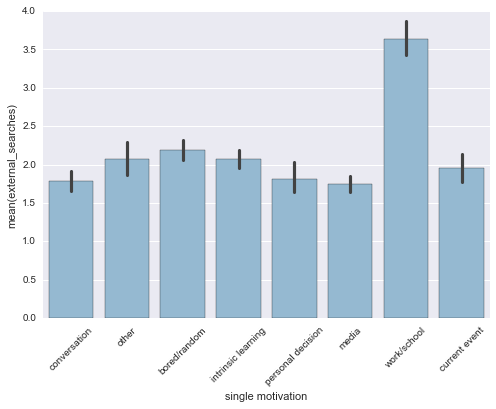

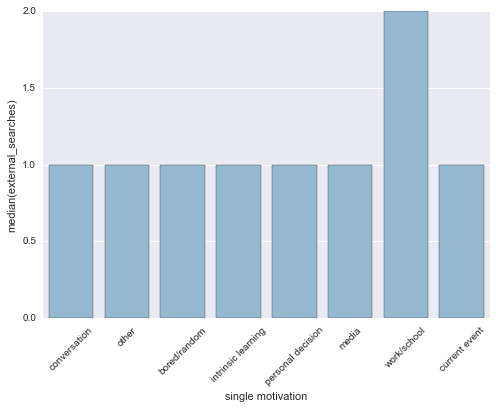

In [27]:
def external_searches(session):
    return len([r for r in session if 'referer_class' in r and r['referer_class'] == 'external (search engine)'])

metric = 'external_searches'
df[metric] = df['click_session'].apply(external_searches)

plot_metric_breakdowns(df, metric)

# Click Tree Metrics

In [15]:
from ml_utils import get_tree_metrics

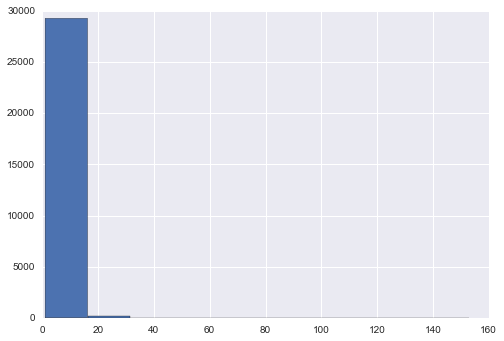

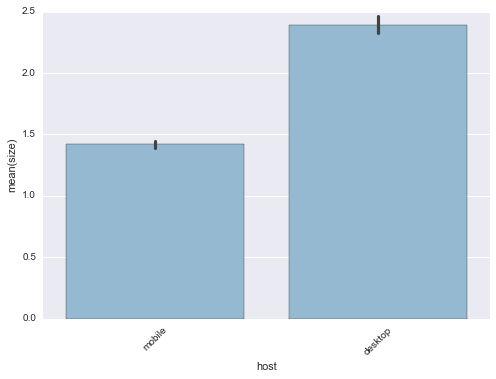

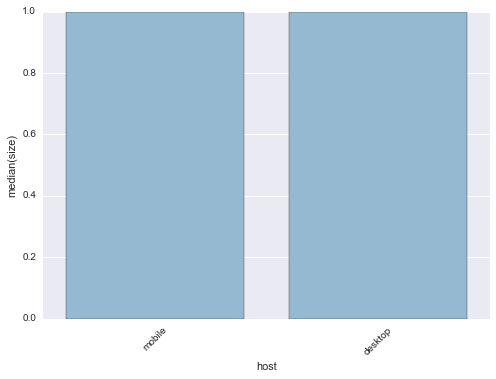

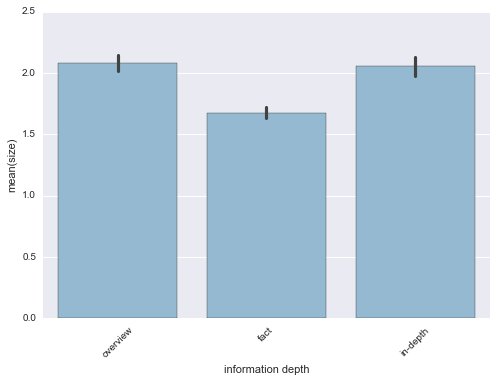

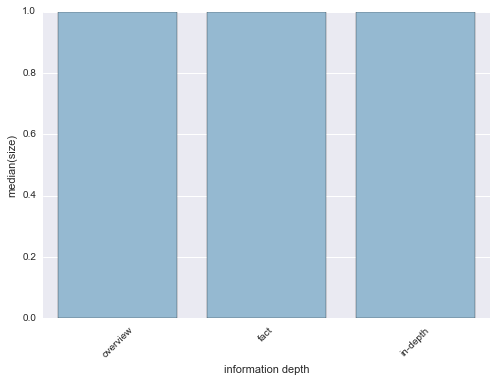

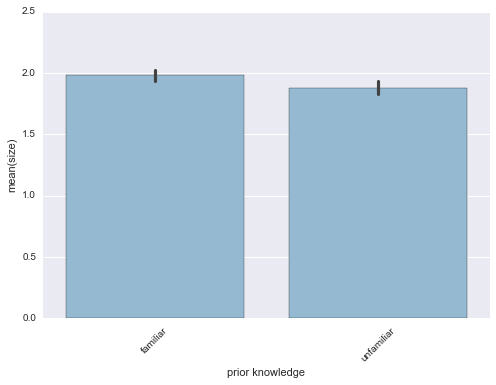

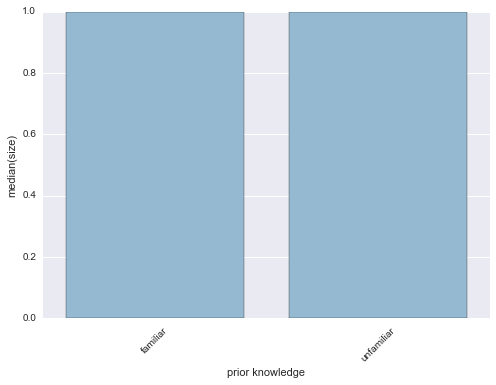

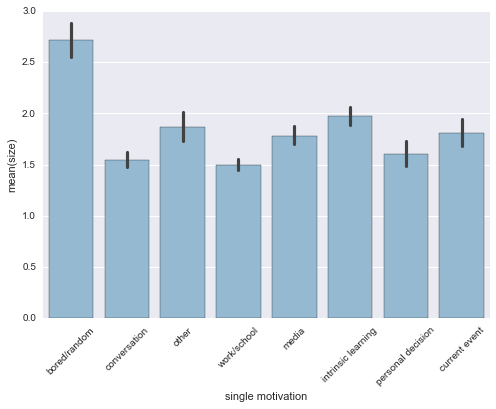

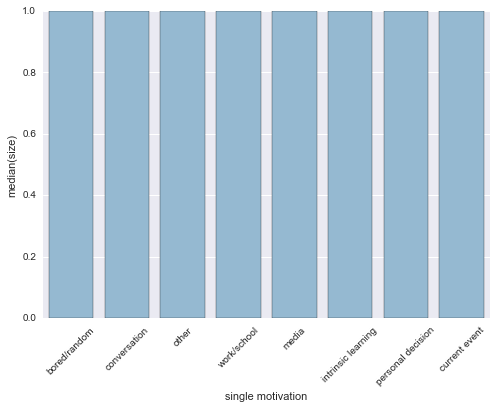

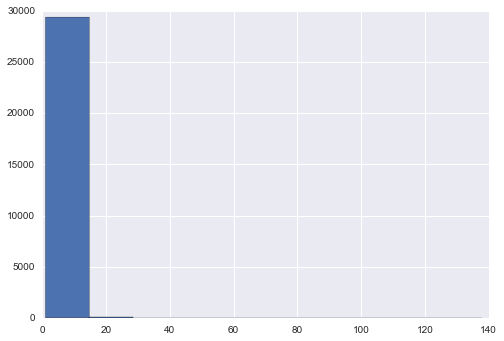

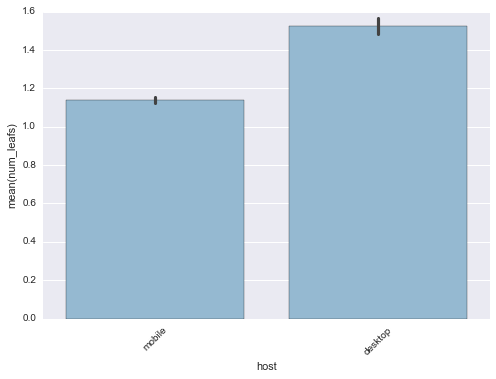

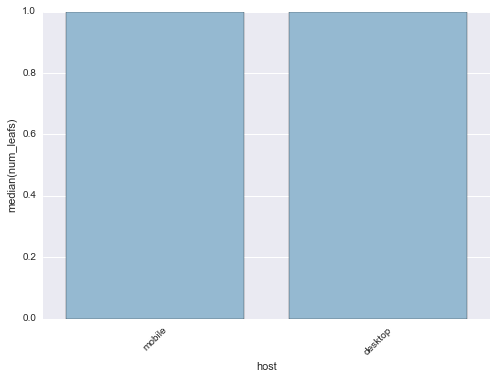

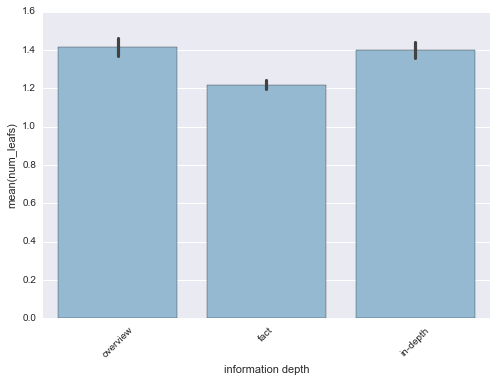

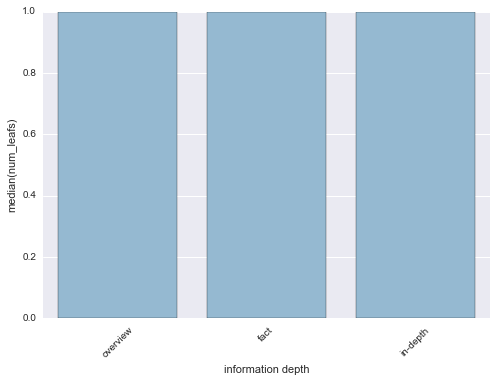

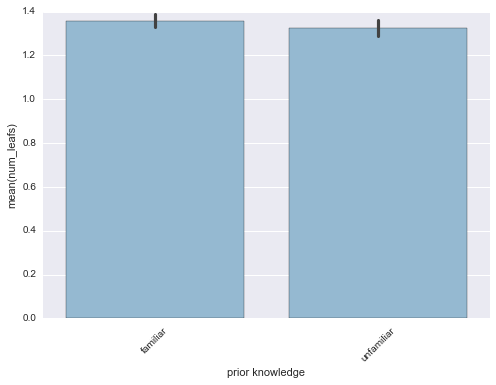

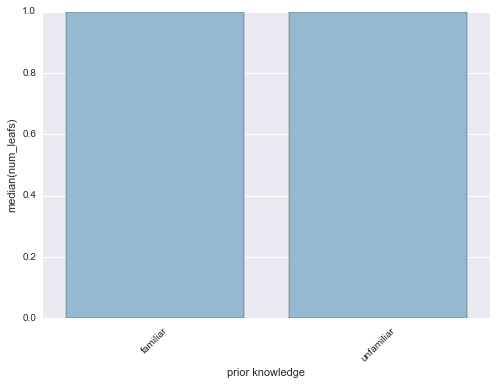

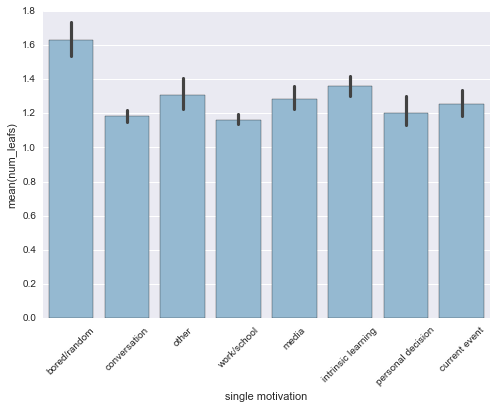

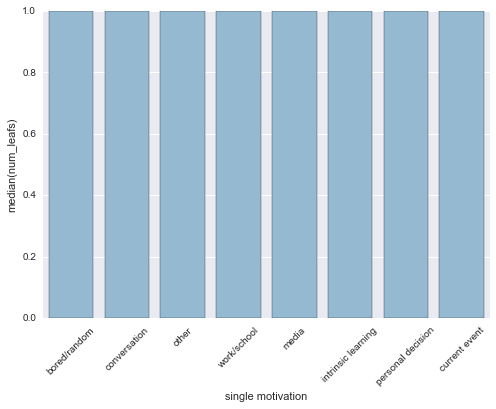

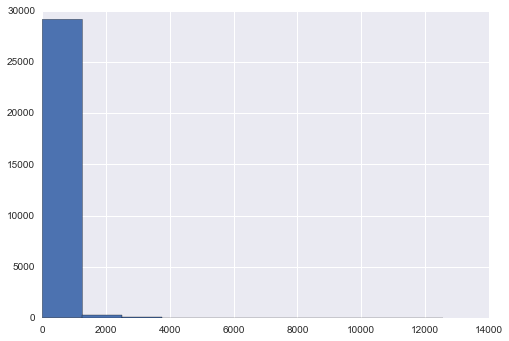

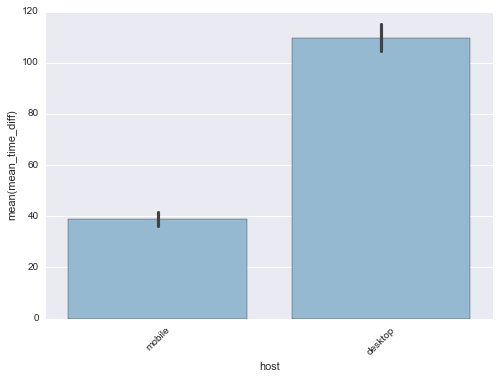

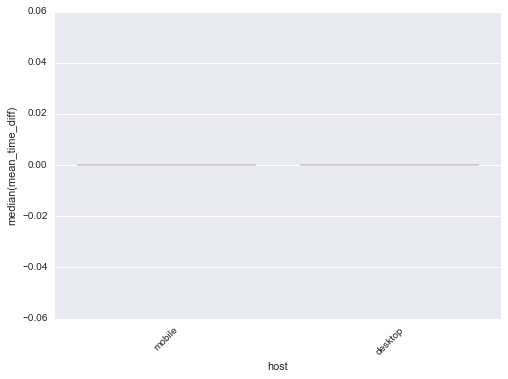

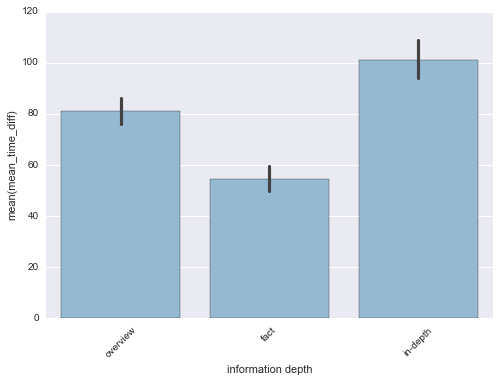

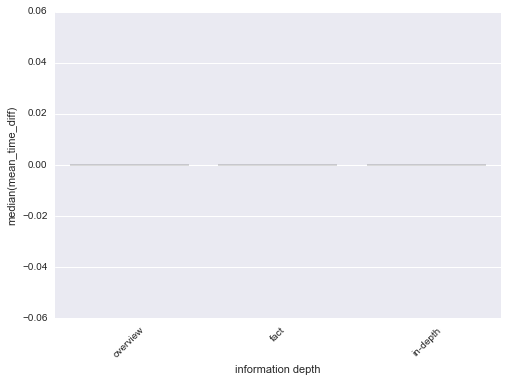

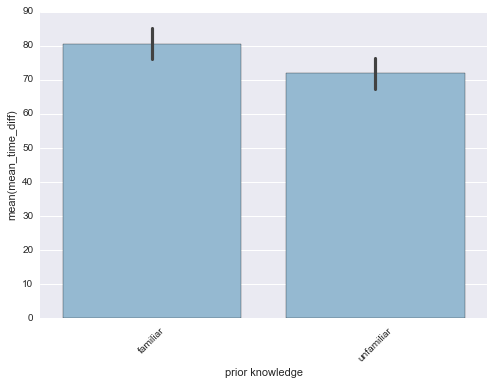

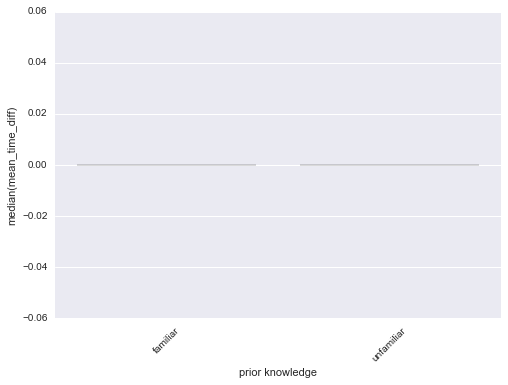

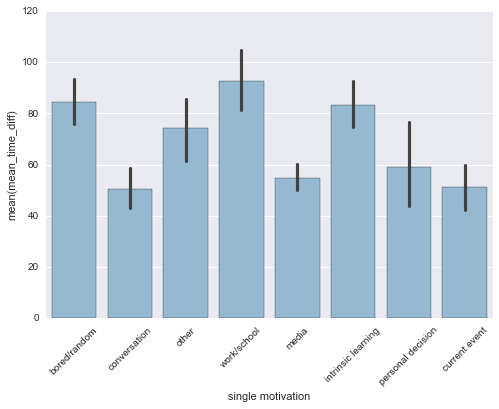

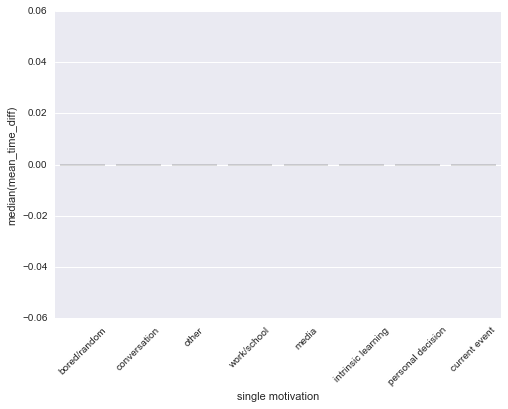

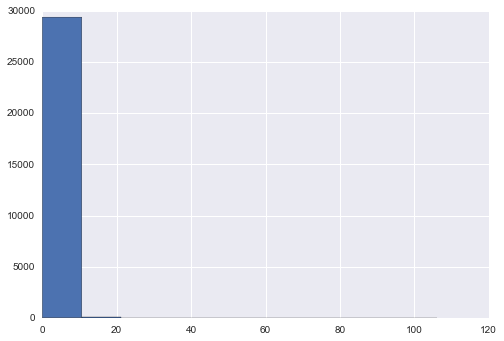

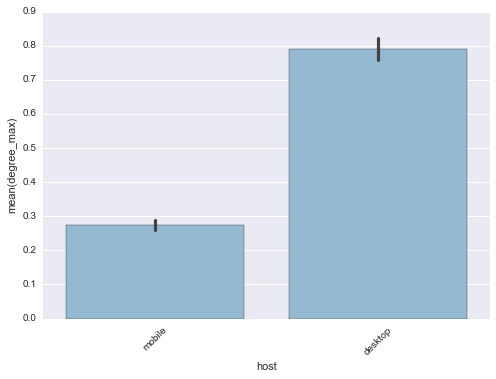

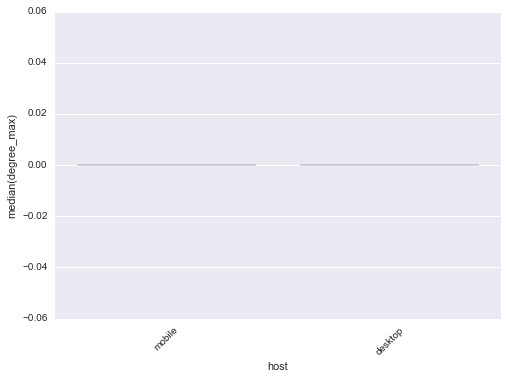

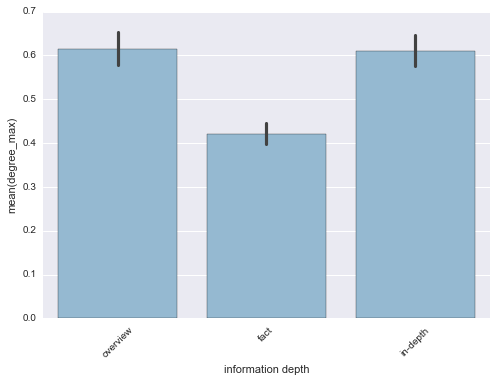

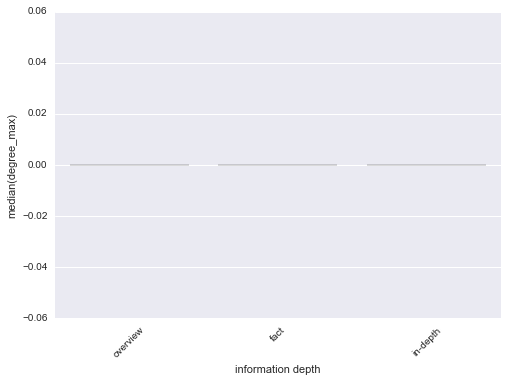

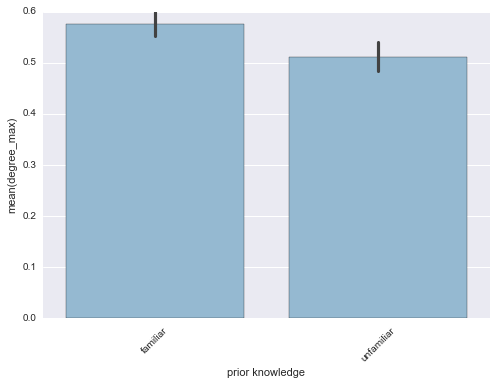

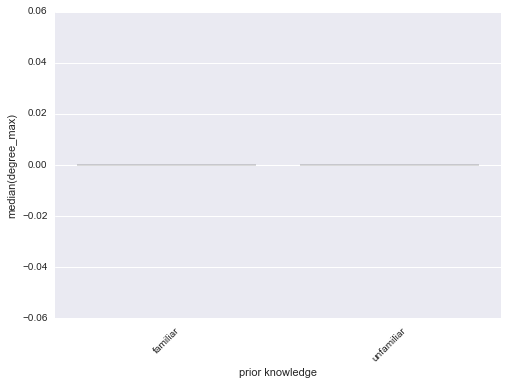

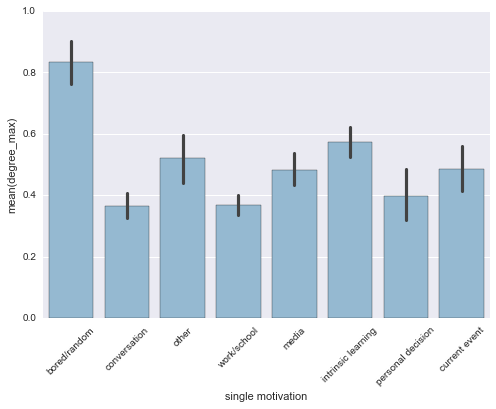

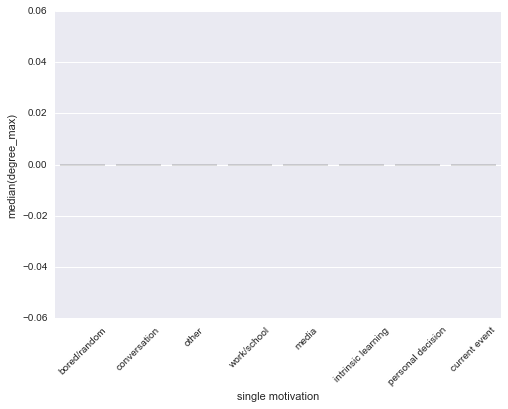

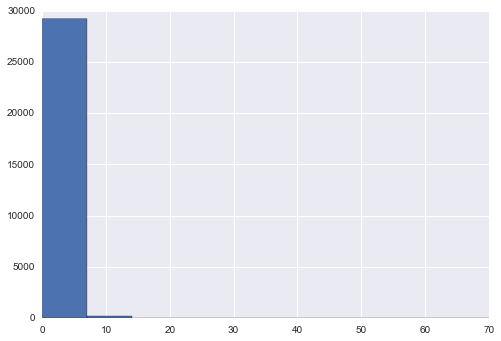

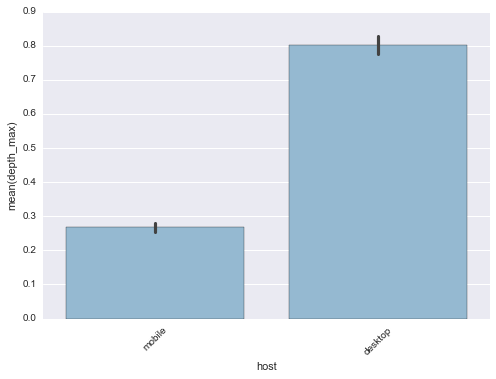

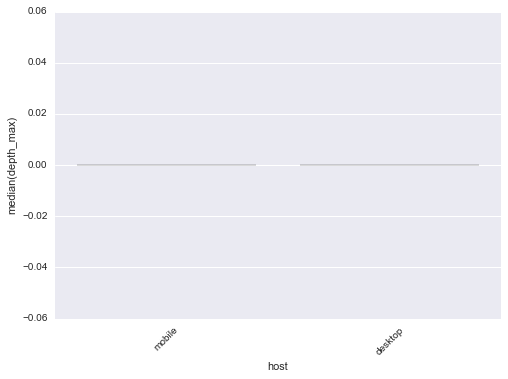

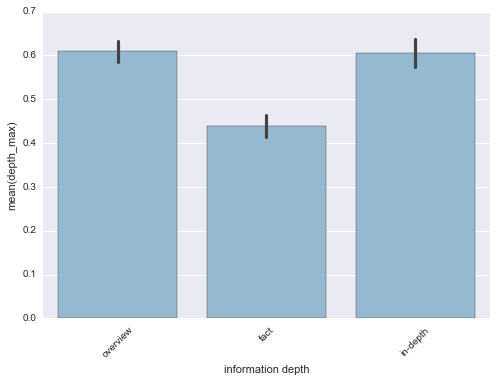

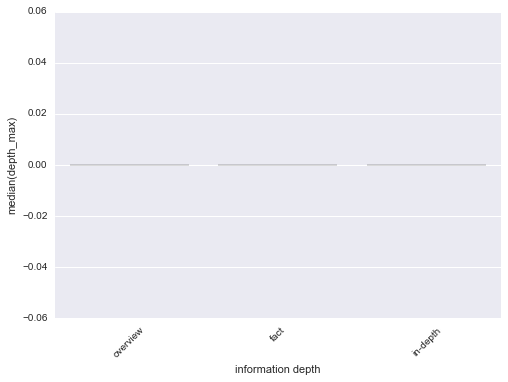

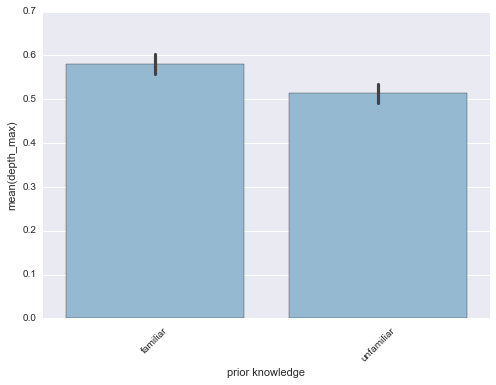

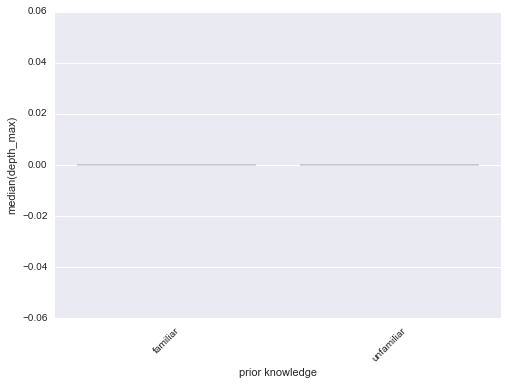

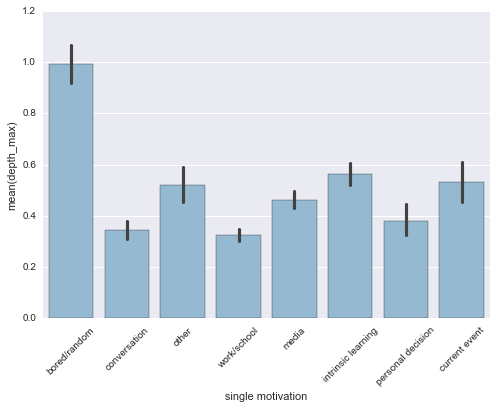

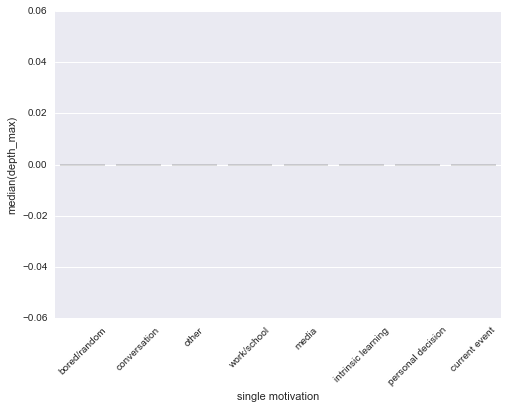

In [36]:
tree_metrics = ['size', 'num_leafs', 'mean_time_diff' , 'degree_max' , 'depth_max']

for m in tree_metrics:
    df[m] = df['click_tree'].apply(lambda x: get_tree_metrics(x)[m])
    plot_metric_breakdowns(df, m)